# Introduction

In [30]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Logistic Regression uses the LLF (log-likelihood function) on all observations to perform MLE (maximum likelihood estimation) using the following equation:

$ \sum_{n}^{i=1} y_i log(p(x_i)) + (i-y_i) log(1-p(x_i))) $


# Hyperplane intuition

In [9]:
# remember sklearn likes 2D arrays

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
m = LogisticRegression()
m.fit(x, y)

LogisticRegression()

In [11]:
# the model is a linear equation with an coefficient and bias
# but it also has identified the 2 classes

m.classes_

array([0, 1])

In [19]:
# generate the hyperplane for visualization

a = - 1/m.coef_[0][0]
b = - m.intercept_[0]
h = a * x + b

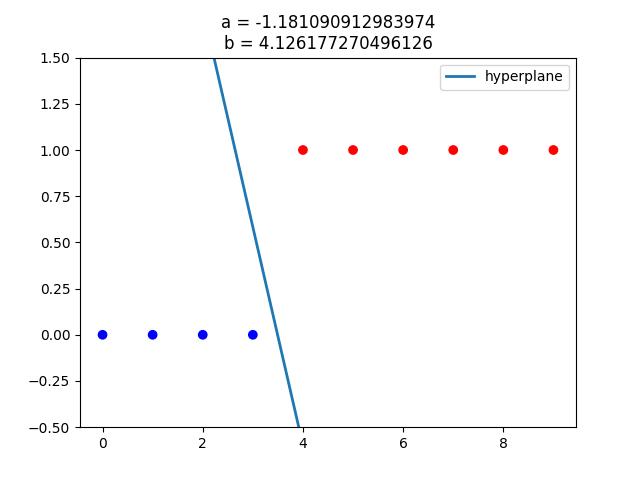

In [20]:
plt.close('all')

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x, h, lw=2, label='hyperplane')
plt.ylim(-0.5, 1.5)

plt.legend()
plt.title('a = {a}\nb = {b}'.format(a=a, b=b))
plt.show()

# Sigmoid activation intuition

Logistic regression produces probabilities using a sigmoid function:


$ σ(x) = \tfrac{1}{1+e^{-x}} $

In [22]:
def σ(x):
    return 1/(1+np.exp(-x))

In [23]:
def softmax(x, κ=0.5):
    if κ >= x: 
        return 0.0
    return 1.0

In [24]:
# generate the logit

a = m.coef_[0][0]
b = m.intercept_[0]
l = a * x + b

# generate the probability

p = σ(l)

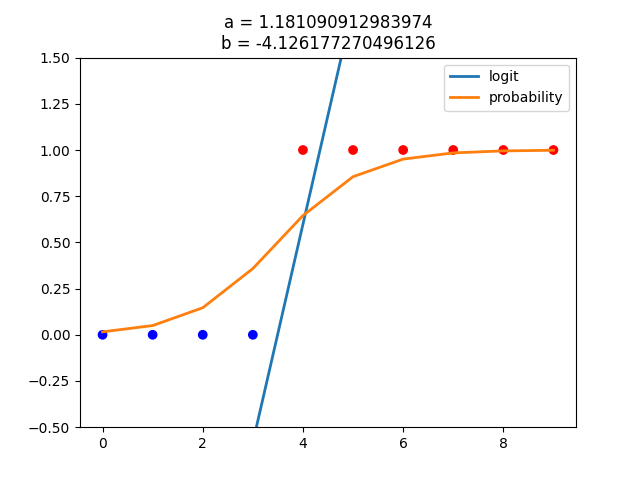

In [25]:
plt.close('all')

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x, l, lw=2, label='logit')
plt.plot(x, p, lw=2, label='probability')
plt.ylim(-0.5, 1.5)

plt.legend()
plt.title('a = {a}\nb = {b}'.format(a=a, b=b))
plt.show()

In [26]:
# let us provide it with some data where we know it will make mistakes

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

ŷ = m.predict(x)

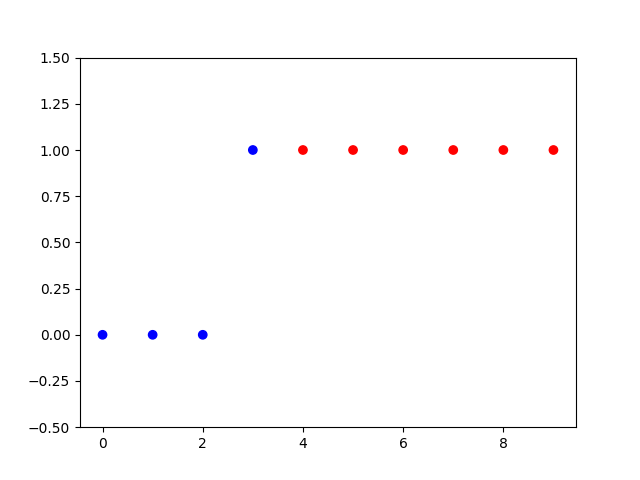

In [27]:
# the fourth sample has been incorrectly classified

plt.close('all')

plt.scatter(x, y, c=ŷ, cmap='bwr')
plt.ylim(-0.5, 1.5)
plt.show()

In [28]:
# if we score the model now we see that 9 out of 10 samples are correct

print('Model accuracy: ' + str(m.score(x, y) * 100) + '%')

Model accuracy: 90.0%


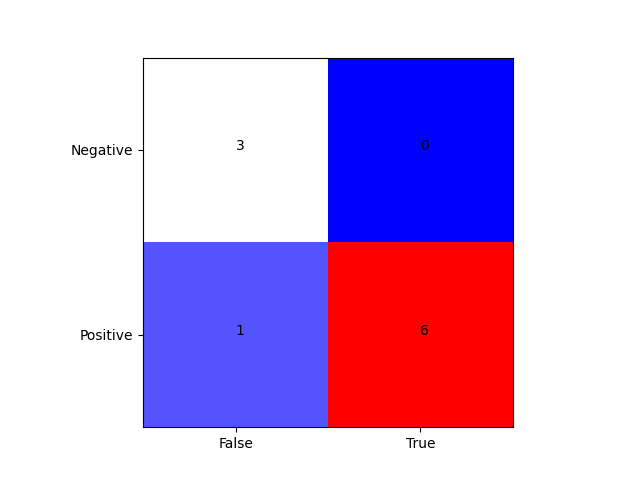

In [31]:
# we can visualize the accuracy of the model using a confusion matrix

acc = confusion_matrix(y, ŷ)

plt.close('all')

fig, ax = plt.subplots()
ax.imshow(acc, cmap='bwr')
ax.xaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Negative', 'Positive'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, acc[i][j], color='black')
plt.show()

# Multivariate Logistic Regression

In [33]:
# let's see if imagine a problem with 8 classes and each sample has 3 bits of data

x = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [34]:
m = LogisticRegression()
m.fit(x, y)

LogisticRegression()

In [35]:
# look at that, the model has learned how to speak binary!

m.predict([[1, 1, 0]])

array([6])

In [36]:
# this model has 3 coefficients for 8 classes of data
# we also note that everything is linearly seperable

m.coef_

array([[-0.40101961, -0.40101961, -0.40101961],
       [-0.40107111, -0.40107111,  0.40107325],
       [-0.40107111,  0.40107325, -0.40107111],
       [-0.40104434,  0.4010463 ,  0.4010463 ],
       [ 0.40107325, -0.40107111, -0.40107111],
       [ 0.4010463 , -0.40104434,  0.4010463 ],
       [ 0.4010463 ,  0.4010463 , -0.40104434],
       [ 0.40104032,  0.40104032,  0.40104032]])

# Nonlinear data

In [37]:
from operator import xor
from functools import reduce

In [38]:
reduce(xor, [0,1,0])

1

In [39]:
# let's see if it can solve a 2-class problem where we bend the output a bit using xor

x = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = list(map(lambda v: reduce(xor, v), x))

y

[0, 1, 1, 0, 1, 0, 0, 1]

In [40]:
# as we can see logistic regression has a difficult time with this simple problem

m = LogisticRegression()
m.fit(x, y)
m.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0])